In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [ ]:
ds = xr.tutorial.open_dataset("air_temperature")  # use xr.tutorial.load_dataset() for xarray<v0.11.0
ds # print the dataset information

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

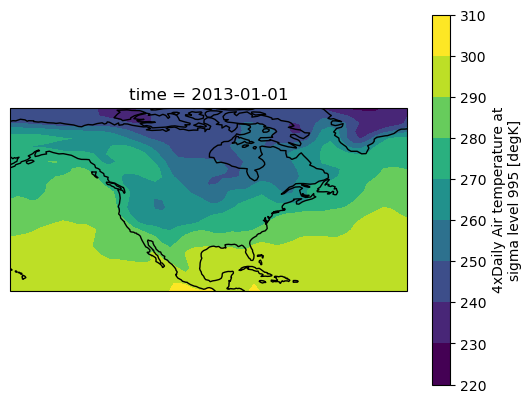

In [11]:
dr = ds['air'] # get the data array

ax = plt.axes(projection=ccrs.PlateCarree())
#the Plate Carrée projection is a simple latitude-longitude grid
dr.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree()) 
#transform=ccrs.PlateCarree() tells cartopy that the data is in the Plate Carrée projection (latitude-longitude).
ax.coastlines()

In [12]:
ds["lat"].values, ds["lon"].values # get the original lat and lon values

(array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. ,
        47.5, 45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5,
        20. , 17.5, 15. ], dtype=float32),
 array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. ,
        222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5,
        245. , 247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. ,
        267.5, 270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5,
        290. , 292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. ,
        312.5, 315. , 317.5, 320. , 322.5, 325. , 327.5, 330. ],
       dtype=float32))

In [24]:
# downsample the grid to 1.0 degree by 1.5 degree resolution
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(ds["lat"].values.min(), ds["lat"].values.max(), 1.0),{"unit": "degrees_north"}),
        "lon": (["lon"], np.arange(ds["lon"].values.min(), ds["lon"].values.max(), 1.5),{"unit": "degrees_east"}),
    }
)   
ds_out

<xarray.Dataset> Size: 1kB
Dimensions:  (lat: 60, lon: 87)
Coordinates:
  * lat      (lat) float64 480B 15.0 16.0 17.0 18.0 19.0 ... 71.0 72.0 73.0 74.0
  * lon      (lon) float64 696B 200.0 201.5 203.0 204.5 ... 326.0 327.5 329.0
Data variables:
    *empty*

`xe.Regridder(grid_in, grid_out, method)` creates a regridder object for interpolating data from one grid to another using the specified method. At this step, you’re only creating a regridder object. It hasn’t actually regridded any variables in ds yet.

In [25]:
regridder = xe.Regridder(ds, ds_out, "conservative")
regridder  # print the regridder information

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_25x53_60x87.nc 
Reuse pre-computed weights? False 
Input grid shape:           (25, 53) 
Output grid shape:          (60, 87) 
Periodic in longitude?      False

In [45]:
dr_out = regridder(dr,keep_attrs=True) # regrid the data array
dr_out

<xarray.DataArray 'air' (time: 2920, lat: 60, lon: 87)> Size: 122MB
array([[[296.29      , 296.62333502, 296.79      , ..., 296.86333371,
         296.79      , 296.66333269],
        [296.1935973 , 296.49328504, 296.64381461, ..., 296.62390905,
         296.5700041 , 296.35767914],
        [295.9       , 296.10000094, 296.2       , ..., 295.9       ,
         295.9       , 295.43333113],
        ...,
        [243.8       , 244.26666159, 244.5       , ..., 233.63335146,
         235.3       , 237.96663767],
        [243.8       , 244.2666615 , 244.5       , ..., 233.63335177,
         235.3       , 237.96663716],
        [241.87101866, 242.63130958, 243.01497823, ..., 233.68293325,
         235.44838318, 237.66943904]],

       [[296.29      , 296.89666974, 297.2       , ..., 296.4       ,
         296.4       , 296.53333401],
        [296.26775322, 296.80641526, 297.07611407, ..., 296.19286003,
         296.17753223, 296.21029338],
        [296.2       , 296.53333491, 296.7       , ..., 295.56666698,
         295.5       , 295.23333208],
...
        [249.89      , 249.49000435, 249.29      , ..., 241.6900087 ,
         242.49      , 243.68998695],
        [249.89      , 249.49000443, 249.29      , ..., 241.69000885,
         242.49      , 243.68998672],
        [246.8481448 , 246.2442981 , 245.94870101, ..., 243.05266439,
         243.60287385, 244.30954445]],

       [[297.69      , 297.95666802, 298.09      , ..., 296.39000101,
         296.19      , 295.85666498],
        [297.29450175, 297.62521298, 297.79267377, ..., 296.21605305,
         296.0664068 , 295.73238881],
        [296.09      , 296.62333585, 296.89      , ..., 295.69      ,
         295.69      , 295.35666509],
        ...,
        [249.89      , 249.49000435, 249.29      , ..., 239.82333841,
         240.29      , 241.22332318],
        [249.89      , 249.49000443, 249.29      , ..., 239.8233385 ,
         240.29      , 241.22332301],
        [246.32880367, 245.82306485, 245.57744556, ..., 241.16116205,
         241.18029908, 241.5703497 ]]], shape=(2920, 60, 87))
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float64 480B 15.0 16.0 17.0 18.0 19.0 ... 71.0 72.0 73.0 74.0
  * lon      (lon) float64 696B 200.0 201.5 203.0 204.5 ... 326.0 327.5 329.0
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [185.16 322.1 ]
    regrid_method:  conservative

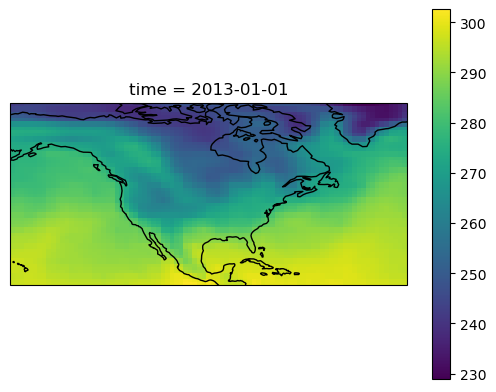

In [30]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines()

In [47]:
print(dr_out["time"])  # get the time values of the regridded data array
print(ds["time"])  # get the time values of the original dataset

<xarray.DataArray 'time' (time: 2920)> Size: 23kB
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      shape=(2920,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time
<xarray.DataArray 'time' (time: 2920)> Size: 23kB
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      shape=(2920,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time


In [46]:
xr.testing.assert_identical(dr_out["time"], ds["time"])

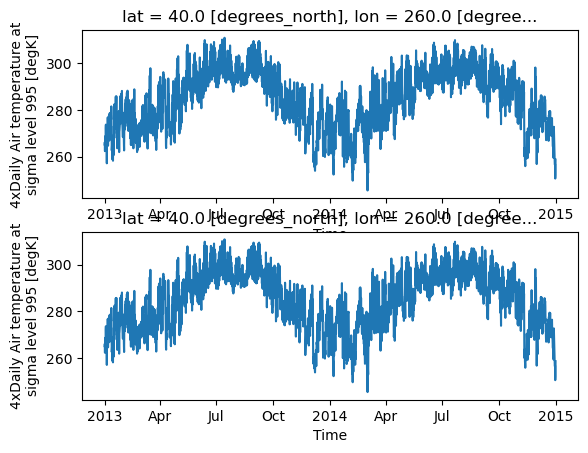

In [48]:
plt.subplot(2, 1, 1)
dr.sel(lon=260, lat=40).plot()  # input data
plt.subplot(2, 1, 2)
dr_out.sel(lon=260, lat=40).plot()  # output data